In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from konlpy.tag import Komoran

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sub = pd.read_csv("data/sample_submission.csv")

In [3]:
display(train)

,id,img_path,overview,cat1,cat2,cat3
0,TRAIN_00000,./image/train/TRAIN_00000.jpg,소안항은 조용한 섬으로 인근해안이 청정해역으로 일찍이 김 양식을 해서 높은 소득을 ...,자연,자연관광지,항구/포구
1,TRAIN_00001,./image/train/TRAIN_00001.jpg,경기도 이천시 모가면에 있는 골프장으로 대중제 18홀이다. 회원제로 개장을 했다가 ...,레포츠,육상 레포츠,골프
2,TRAIN_00002,./image/train/TRAIN_00002.jpg,금오산성숯불갈비는 한우고기만을 전문적으로 취급하고 사용하는 부식 자재 또한 유기농법...,음식,음식점,한식
3,TRAIN_00003,./image/train/TRAIN_00003.jpg,철판 위에서 요리하는 안동찜닭을 맛볼 수 있는 곳이다. 경상북도 안동시에 있는 한식...,음식,음식점,한식
4,TRAIN_00004,./image/train/TRAIN_00004.jpg,※ 영업시간 10:30 ~ 20:30\n\n3대에 걸쳐 아귀만을 전문으로 취급하는 ...,음식,음식점,한식
...,...,...,...,...,...,...
16981,TRAIN_16981,./image/train/TRAIN_16981.jpg,해발 12000m에 자리한 식담겸 카페점문점이다.<br>곤드레밥과 감자전을 판매하고...,음식,음식점,한식
16982,TRAIN_16982,./image/train/TRAIN_16982.jpg,설악힐호텔은 동해고속도로 속초톨게이트에서 멀지 않은 관광로 변에 있다. 속초의 대표...,숙박,숙박시설,모텔
16983,TRAIN_16983,./image/train/TRAIN_16983.jpg,충남 서산시 중심가에 위치한 줌모텔은 프라이버스가 보장되는 조용한 공간으로 가치가 ...,숙박,숙박시설,모텔
16984,TRAIN_16984,./image/train/TRAIN_16984.jpg,토토큰바위캠핑장은 경기도 가평지역 내에서도 청정지역으로 손꼽히는 지역으로 주변에 화...,레포츠,육상 레포츠,"야영장,오토캠핑장"


In [4]:
display(test)

,id,img_path,overview
0,TEST_00000,./image/test/TEST_00000.jpg,신선한 재료로 정성을 다해 만들었다. 늘 변함없는 맛과 서비스로 모실것을 약속한다.
1,TEST_00001,./image/test/TEST_00001.jpg,"청청한 해역 등량만과 율포해수욕장이 한눈에 내려다 보이는 위치에 있으며, 막 잡은 ..."
2,TEST_00002,./image/test/TEST_00002.jpg,장터설렁탕은 남녀노소 누구나 즐길 수 있는 전통 건강식으로 좋은 재료와 전통 조리방...
3,TEST_00003,./image/test/TEST_00003.jpg,다양한 형태의 청소년수련활동을 제공함으로써 청소년들이 민주사회의 주역이 될 수 있도...
4,TEST_00004,./image/test/TEST_00004.jpg,팔공산은 경산시의 북쪽에 위치한 해발 1192.3 m의 높은 산으로 신라시대에는 중...
...,...,...,...
7275,TEST_07275,./image/test/TEST_07275.jpg,"막국수와 수육을 주메뉴로 하며, 넓은 주차장이 마련되어 있어 주차하기 편리하다.<br>"
7276,TEST_07276,./image/test/TEST_07276.jpg,"통진두레문화센터는 우리고유의 전통무형문화와 민속예술을 계승/발전 시키고, 다양한 문..."
7277,TEST_07277,./image/test/TEST_07277.jpg,"수도권에서 가까운 위치, 문산천을 따라 걷는 산책코스, 한여름 더위를 날려버릴 시원..."
7278,TEST_07278,./image/test/TEST_07278.jpg,\n전남 구례군 관산리에 위치한 노고단 게스트하우스&호텔은 지리산을 파노라마로 관망...


In [5]:
display(sub)

,id,cat3
0,TEST_00000,한식
1,TEST_00001,한식
2,TEST_00002,한식
3,TEST_00003,한식
4,TEST_00004,한식
...,...,...
7275,TEST_07275,한식
7276,TEST_07276,한식
7277,TEST_07277,한식
7278,TEST_07278,한식


In [6]:
train['cat1'].unique()

array(['자연', '레포츠', '음식', '인문(문화/예술/역사)', '숙박', '쇼핑'], dtype=object)

In [7]:
train['cat2'].unique()

array(['자연관광지', '육상 레포츠', '음식점', '축제', '역사관광지', '문화시설', '휴양관광지', '숙박시설',
       '공연/행사', '쇼핑', '체험관광지', '복합 레포츠', '건축/조형물', '관광자원', '수상 레포츠',
       '산업관광지', '항공 레포츠', '레포츠소개'], dtype=object)

In [8]:
train['cat3'].unique()

array(['항구/포구', '골프', '한식', '야영장,오토캠핑장', '섬', '일반축제', '유적지/사적지', '일식',
       '자연휴양림', '전시관', '관광단지', '모텔', '스키(보드) 렌탈샵', '바/까페', '채식전문점',
       '한옥스테이', '컨벤션', '성', '중식', '안보관광', '전문상가', '이색거리', '해수욕장', '5일장',
       '미술관/화랑', '공원', '상설시장', '박물관', '도서관', '공연장', '농.산.어촌 체험', '복합 레포츠',
       '펜션', '산', '기념탑/기념비/전망대', '기념관', '자동차경주', '자전거하이킹', '희귀동.식물',
       '유명건물', '수목원', '유원지', '사찰', '강', '자연생태관광지', '박람회', '문화전수시설', '계곡',
       '폭포', '서양식', '종교성지', '동상', '기타행사', '고택', '국립공원', '게스트하우스', '썰매장',
       '요트', '문화원', '래프팅', '승마', '공예,공방', '트래킹', '온천/욕장/스파', '수련시설',
       '해안절경', '패밀리레스토랑', '기암괴석', '기타', '홈스테이', '민물낚시', '콘도미니엄', '민박',
       '테마공원', '유람선/잠수함관광', '바다낚시', '수영', '백화점', '호수', '카약/카누', '외국문화원',
       '면세점', '다리/대교', '카지노', '분수', '동굴', '도립공원', '윈드서핑/제트스키', '특산물판매점',
       '유스호스텔', '고궁', '서비스드레지던스', '민속마을', '전통공연', '문', '식음료', '번지점프',
       '터널', '문화관광축제', '카트', '클럽', '발전소', '대중콘서트', 'MTB', '군립공원', '스케이트',
       '대형서점', '생가', '스카이다이빙', '영화관', '헹글라이딩/패러글라이딩', '스노쿨링/스킨스쿠버다이

In [9]:
print(f"number of cat1 : {len(train['cat1'].unique())}")
print(f"number of cat2 : {len(train['cat2'].unique())}")
print(f"number of cat3 : {len(train['cat3'].unique())}")

number of cat1 : 6
number of cat2 : 18
number of cat3 : 128


In [10]:
train['overview'].isnull().sum()

0

In [11]:
train.duplicated(['overview']).sum()

13

In [12]:
train['overview'].tail(10)

16976    돈너미 지역은 암회색 석회암층 위에 수십 개의 돌리네와 우발라, 대형 싱크홀이 분포...
16977    양념족발로 유명한 가운데집은 전주 추천대교 인근에 위치한다. 일반 족발집보다는 다소...
16978    경기 의왕시 오전동에 위치한 도래샘은 촌닭 불고기 쌈밥정식으로 유명한 백운호수 맛집...
16979    * 체험으로 깨닫게 만드는 교육원, 부산광역시학생교육원<br /><br />부산의 ...
16980    천관산을 남도의 명승지로 가꾸고자 나선 대덕읍민들이 매년 수천 그루씩의 단풍나무를 ...
16981    해발 12000m에 자리한 식담겸 카페점문점이다.<br>곤드레밥과 감자전을 판매하고...
16982    설악힐호텔은 동해고속도로 속초톨게이트에서 멀지 않은 관광로 변에 있다. 속초의 대표...
16983    충남 서산시 중심가에 위치한 줌모텔은 프라이버스가 보장되는 조용한 공간으로 가치가 ...
16984    토토큰바위캠핑장은 경기도 가평지역 내에서도 청정지역으로 손꼽히는 지역으로 주변에 화...
16985    포천의 진산으로 불리우는 왕방산(王訪山)에는 천년의 역사를 간직하고 있는 왕산사(王...
Name: overview, dtype: object

In [13]:
for i in range(len(train)):
    train['overview'][i] = train['overview'][i].replace('\n','').replace('\t','').replace('\r','').replace('<br>', '').replace('<br />','').replace('*','')
    train['overview'][i] = train['overview'][i].strip()

In [14]:
train['overview'].tail(10)

16976    돈너미 지역은 암회색 석회암층 위에 수십 개의 돌리네와 우발라, 대형 싱크홀이 분포...
16977    양념족발로 유명한 가운데집은 전주 추천대교 인근에 위치한다. 일반 족발집보다는 다소...
16978    경기 의왕시 오전동에 위치한 도래샘은 촌닭 불고기 쌈밥정식으로 유명한 백운호수 맛집...
16979    체험으로 깨닫게 만드는 교육원, 부산광역시학생교육원부산의 진산 금정산(해발 801....
16980    천관산을 남도의 명승지로 가꾸고자 나선 대덕읍민들이 매년 수천 그루씩의 단풍나무를 ...
16981       해발 12000m에 자리한 식담겸 카페점문점이다.곤드레밥과 감자전을 판매하고 있다.
16982    설악힐호텔은 동해고속도로 속초톨게이트에서 멀지 않은 관광로 변에 있다. 속초의 대표...
16983    충남 서산시 중심가에 위치한 줌모텔은 프라이버스가 보장되는 조용한 공간으로 가치가 ...
16984    토토큰바위캠핑장은 경기도 가평지역 내에서도 청정지역으로 손꼽히는 지역으로 주변에 화...
16985    포천의 진산으로 불리우는 왕방산(王訪山)에는 천년의 역사를 간직하고 있는 왕산사(王...
Name: overview, dtype: object

In [15]:
encoder = LabelEncoder()

encoder.fit(train['cat3'])
train['cat3'] = encoder.transform(train['cat3'])

In [16]:
train['cat3']

0        120
1          8
2        118
3        118
4        118
        ... 
16981    118
16982     31
16983     31
16984     73
16985     52
Name: cat3, Length: 16986, dtype: int32

In [17]:
print(encoder.classes_)

['5일장' 'ATV' 'MTB' '강' '게스트하우스' '계곡' '고궁' '고택' '골프' '공연장' '공예,공방' '공원'
 '관광단지' '국립공원' '군립공원' '기념관' '기념탑/기념비/전망대' '기암괴석' '기타' '기타행사' '농.산.어촌 체험'
 '다리/대교' '대중콘서트' '대형서점' '도립공원' '도서관' '동굴' '동상' '등대' '래프팅' '면세점' '모텔' '문'
 '문화관광축제' '문화원' '문화전수시설' '뮤지컬' '미술관/화랑' '민물낚시' '민박' '민속마을' '바/까페' '바다낚시'
 '박람회' '박물관' '발전소' '백화점' '번지점프' '복합 레포츠' '분수' '빙벽등반' '사격장' '사찰' '산' '상설시장'
 '생가' '서비스드레지던스' '서양식' '섬' '성' '수련시설' '수목원' '수상레포츠' '수영' '스노쿨링/스킨스쿠버다이빙'
 '스카이다이빙' '스케이트' '스키(보드) 렌탈샵' '스키/스노보드' '승마' '식음료' '썰매장' '안보관광'
 '야영장,오토캠핑장' '약수터' '연극' '영화관' '온천/욕장/스파' '외국문화원' '요트' '윈드서핑/제트스키'
 '유람선/잠수함관광' '유명건물' '유스호스텔' '유원지' '유적지/사적지' '이색거리' '이색찜질방' '이색체험'
 '인라인(실내 인라인 포함)' '일반축제' '일식' '자동차경주' '자연생태관광지' '자연휴양림' '자전거하이킹' '전문상가'
 '전시관' '전통공연' '종교성지' '중식' '채식전문점' '카약/카누' '카지노' '카트' '컨벤션' '컨벤션센터' '콘도미니엄'
 '클래식음악회' '클럽' '터널' '테마공원' '트래킹' '특산물판매점' '패밀리레스토랑' '펜션' '폭포' '학교' '한식'
 '한옥스테이' '항구/포구' '해수욕장' '해안절경' '헬스투어' '헹글라이딩/패러글라이딩' '호수' '홈스테이' '희귀동.식물']


In [18]:
len(encoder.classes_)

128

In [19]:
tokenizer = Komoran()

def preprocess(train):
    train.drop_duplicates(subset=['overview'], inplace=True)
    train = train.dropna()
    print(f"train shape => {train.shape}")
    
    train_tokenized = [[token+"/"+POS for token, POS in tokenizer.pos(doc_)] for doc_ in train['overview']]
    
    exclusion_tags = ['JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ', 'JX', 'JC',
                      'SF', 'SP', 'SS', 'SE', 'SO', 'EF', 'EP', 'EC', 'ETN', 'ETM',
                      'XSN', 'XSV', 'XSA']
    
    f = lambda x: x in exclusion_tags
    
    X_train = []
    for i in range(len(train_tokenized)):
        temp = []
        for j in range(len(train_tokenized[i])):
            if f(train_tokenized[i][j].split('/')[1]) is False:
                temp.append(train_tokenized[i][j].split('/')[0])
        X_train.append(temp)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(30000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
    
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
    
    X_train = list(map(wordlist_to_indexlist, X_train))
    
    return X_train, np.array(list(train['cat3'])), word_to_index

In [20]:
train_, label_, word_to_index = preprocess(train)

train shape => (16973, 6)


In [21]:
len(word_to_index)

30000

In [24]:
label_

array([120,   8, 118, ...,  31,  73,  52])

In [25]:
num_tokens = [len(tokens) for tokens in train_]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print(f'설정 최대 길이: {maxlen}')
print(f'전체 문장의 {np.sum(num_tokens < max_tokens) / len(num_tokens)}%가 설정값인 {maxlen}에 포함됩니다.')

토큰 길이 평균: 94.5287810051258
토큰 길이 최대: 2324
토큰 길이 표준편차: 79.36690859447168
설정 최대 길이: 253
전체 문장의 0.9619984681553054%가 설정값인 253에 포함됩니다.


In [26]:
len(train_)

16973

In [27]:
select_length = 250

In [28]:
temp = []
for i in range(len(train_)):
    if len(train_[i]) > select_length:
        temp.append(i)

temp.reverse()

for i in temp:
    train.drop(train.index[i], inplace=True)

In [29]:
len(train)

16310

In [30]:
train_, label_, word_to_index = preprocess(train)

train shape => (16310, 6)


In [31]:
num_tokens = [len(tokens) for tokens in train_]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

토큰 길이 평균: 83.55144083384427
토큰 길이 최대: 250
토큰 길이 표준편차: 49.83794359495982


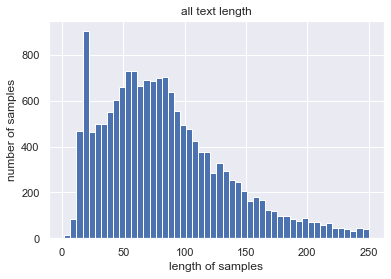

In [32]:
sns.set_theme(style="darkgrid")
plt.title('all text length')
plt.hist(num_tokens, bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [33]:
train_ = tf.keras.preprocessing.sequence.pad_sequences(train_,
                                                       padding='pre',
                                                       value=word_to_index["<PAD>"],
                                                       maxlen=250)

In [38]:
vocab_size = 30000
word_vector_dim = 16

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(units=256))
model.add(tf.keras.layers.Dense(128, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          480000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               279552    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
Total params: 792,448
Trainable params: 792,448
Non-trainable params: 0
_________________________________________________________________


In [39]:
X_train, X_val, y_train, y_val = train_test_split(train_, label_, test_size=0.2, shuffle=True,
                                                  stratify=label_, random_state=777)

In [40]:
history = model.fit(X_train, y_train, epochs=50, batch_size=512,
                    validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
26/26 [==============================] - 3s 81ms/step - loss: 4.0371 - accuracy: 0.1860 - val_loss: 3.6672 - val_accuracy: 0.2103
Epoch 2/50
26/26 [==============================] - 1s 49ms/step - loss: 3.6673 - accuracy: 0.2102 - val_loss: 3.6488 - val_accuracy: 0.2103
Epoch 3/50
26/26 [==============================] - 1s 49ms/step - loss: 3.6533 - accuracy: 0.2102 - val_loss: 3.6369 - val_accuracy: 0.2103
Epoch 4/50
26/26 [==============================] - 1s 49ms/step - loss: 3.6361 - accuracy: 0.2102 - val_loss: 3.6104 - val_accuracy: 0.2103
Epoch 5/50
26/26 [==============================] - 1s 49ms/step - loss: 3.5707 - accuracy: 0.2163 - val_loss: 3.4596 - val_accuracy: 0.2508
Epoch 6/50
26/26 [==============================] - 2s 60ms/step - loss: 3.2743 - accuracy: 0.2801 - val_loss: 3.1360 - val_accuracy: 0.2857
Epoch 7/50
26/26 [==============================] - 1s 49ms/step - loss: 3.0556 - accuracy: 0.3072 - val_loss: 2.9872 - val_accuracy: 0.3133
Epoch 8/50
26

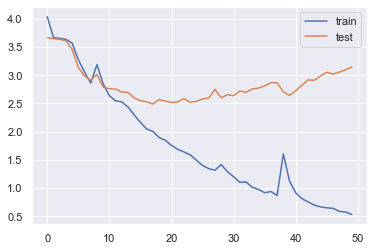

In [41]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()